## Exploratory data analysis (part 1)
Supervised Learning

In [113]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import requests
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from scipy import spatial

In [2]:
df = pd.read_csv('Data/example_data1.csv')

In [3]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
# Eliminates rows with NA-values
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
# Eliminates coulmns with NA-values
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [7]:
# drops the rows where all of its values are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [8]:
# it only drops the rows where NaN appear in the column ‘D’

df.dropna(subset=['D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


In [9]:
df_car = pd.read_csv('Data/car_data.csv')
df_car['num-of-doors'].unique()



array(['two', 'four', nan], dtype=object)

In [10]:
mean = df_car['engine-size'].mean()
df_car = df_car.replace('?',mean)
df_car['engine-size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

### SimpleImputer

In [11]:
# Replacing NaN with imputer

my_miss = np.NaN
my_stra = 'mean'

imputer = SimpleImputer(missing_values=my_miss, strategy=my_stra)

imputer = imputer.fit(df)
imputed_data = imputer.transform(df.values)
imputed_data


c:\Users\ellins\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [12]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

imputer = imputer.fit(df)
imputed_data = imputer.transform(df.values)
imputed_data


c:\Users\ellins\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  3.,  8.],
       [ 0., 11., 12.,  4.]])

In [13]:
df_car.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

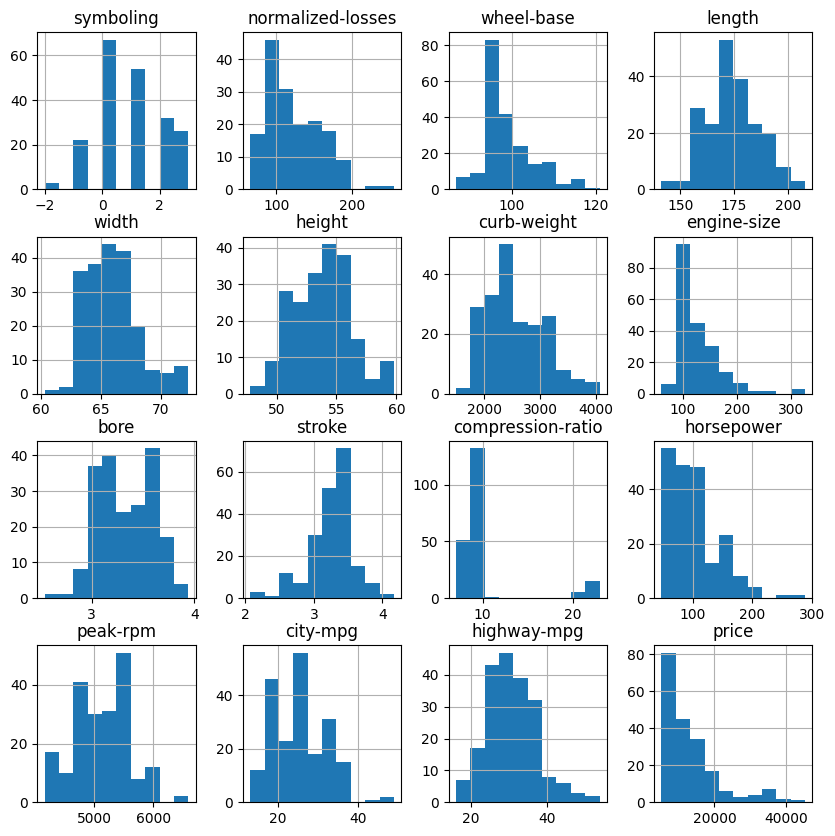

In [14]:
df_car.hist(figsize=(10,10))

In [15]:
# Which roww has most missing values?
df_car.isna().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [16]:

mean_before=df_car.loc[:,'normalized-losses'].mean()
std_before=df_car.loc[:,'normalized-losses'].std()

In [17]:

df_car=df_car.replace(np.NAN,mean_before)
mean_after=df_car.loc[:,"normalized-losses"].mean()
std_after=df_car.loc[:,"normalized-losses"].std()

In [18]:

print('mean before:',mean_before,'--->', \
'mean_after:',mean_after)

print('std before:',std_before,'--->', \
'std_after:',std_after)

mean before: 122.0 ---> mean_after: 122.0
std before: 35.442167530553256 ---> std_after: 31.75894428144489


In [19]:
data = {"house age [y]": [10,15,20,25,30,35,40], 
        "city 1 [m]": [1,0.5,0.3,0.2,0.1,0.09,0.08],
        "city 2 [m]": [35, 30, 25, 20, 15, 10,  5],
        "city 3 [m]": [10 ,9.9, 9.8, 9.6, 9.3, 9.1, 9.05],
        "city 4 [m]": [15 ,14.9, 14.8, 14.6, 14.3, 14.1, 14]}

house_df = pd.DataFrame(data)

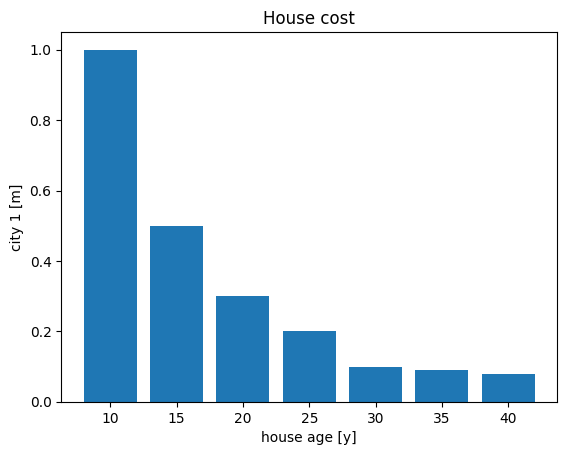

In [20]:
width = 4
plt.bar(house_df.iloc[:,0], house_df.iloc[:,1], width)
plt.xlabel('house age [y]')
plt.ylabel('city 1 [m]')
plt.title('House cost')
plt.show()

<Axes: >

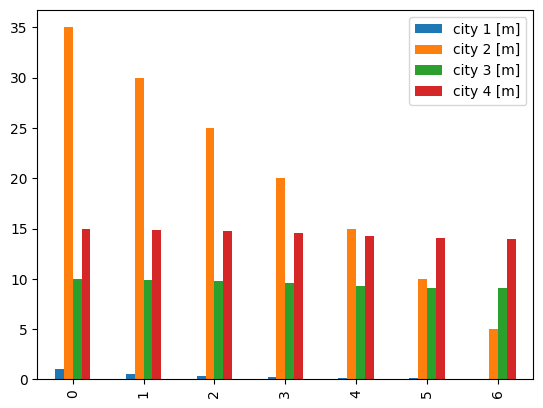

In [21]:
house_df.loc[:,'city 1 [m]':'city 4 [m]'].plot(kind='bar')


<Axes: >

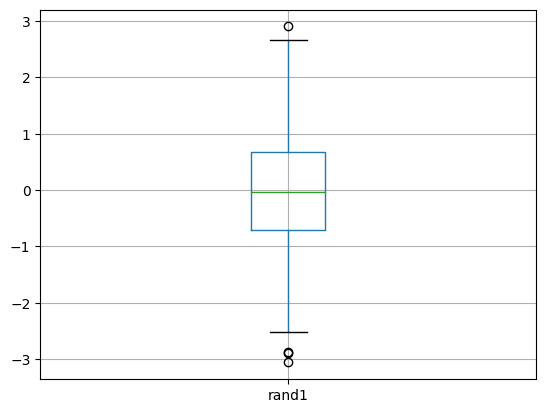

In [22]:
mu = 0 
sigma = 1
rand_data = np.random.normal(mu, sigma, size=1000)
df_rand = pd.DataFrame({'rand1':rand_data})
df_rand.boxplot()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'peak-rpm'}>]], dtype=object)

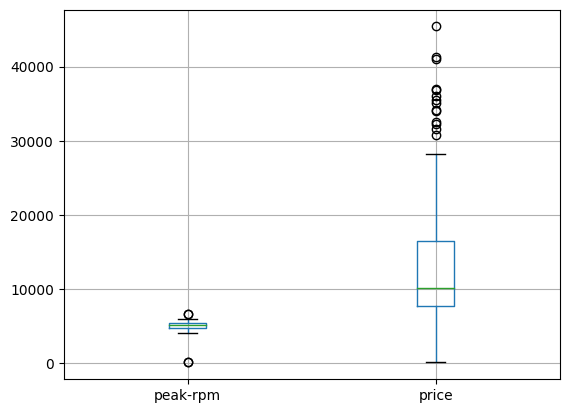

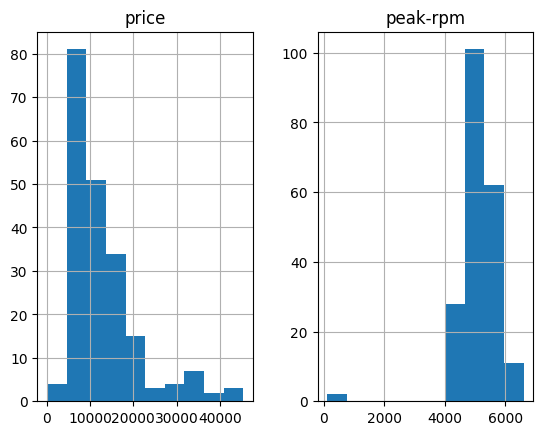

In [23]:
df_car.boxplot(column=['peak-rpm','price'])
df_car.hist(column=['price','peak-rpm'])

In [24]:
# Reading files 
# file = open(“filename”, “mode”)
# file.read()
# file.close()

# ‘r’ – read mode
# ‘w’ – write mode
# ‘a’ – append mode
# ‘r+’ – special read and write mode


In [25]:
# Reading files 
with open('house_df.txt') as file:
    data = file.read()

In [26]:
# Wrtiting files
file = open("house_df.txt", "w") 
file.write('Hello World!')
file.close()


In [27]:
def read_write_75char(name):
    file1 = open(name, 'r')
    html_content = file1.read()
    file1.close()
    file2 = open('html_to_text.txt', 'w')
    file2.write(html_content[:75])
    file2.close()


In [28]:
# Testing function 
read_write_75char('Data/ParseMe.html')

### Response

In [29]:
response = requests.get('https://api.github.com/user')

In [30]:
response.status_code

401

In [31]:
response.headers['content-type']

'application/json; charset=utf-8'

In [32]:
response.encoding

'utf-8'

In [33]:
response.text

'{"message":"Requires authentication","documentation_url":"https://docs.github.com/rest/reference/users#get-the-authenticated-user"}'

In [34]:
url = 'https://www.imdb.com/title/tt0052357/reviews'
response = requests.get(url=url)
print(response.text[0:130])











<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
    


### BeautifulSoup

In [35]:
html_soup = BeautifulSoup(response.text, 'html.parser')

In [36]:
movie_containers = html_soup.find_all('div', class_ = 'text show-more__control')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
25


In [37]:
movie_containers[0]

<div class="text show-more__control">One of the many things that made Hitchcock such a great director is that he did not just stick to the same formula time after time; all of his best movies have their own unique feel and characteristics.  "Vertigo" is particularly distinctive, both as a complex story filled with suspense, and as a fascinating study in psychological tension.  While it lacks the humor of some of Hitchcock's other masterpieces, and sometimes moves rather slowly, it is unforgettable, and a great achievement by the director and his cast.<br/><br/>If you have never seen it, you will enjoy it more if you do not know too much about the plot, although the actual story is somewhat secondary to the ways that the characters are tested and their weaknesses exposed by the various events.  Hitchcock uses a complicated story, interesting characters, lavish visual detail, and deliberate pacing, plus a fine musical score by the incomparable Bernard Hermann, to produce a mysterious, al

In [38]:
file = open('Data/ParseMe.html', 'r')
html_doc = file.read()
file.close()

In [39]:
def parse_links(html_document=html_doc):
    html_soup = BeautifulSoup(html_document, 'html.parser')
    for link in html_soup.find_all('a'):
        print(link.get('href'))

# Not filling the function with any parameter because it is already defined
parse_links()

https://en.wikipedia.org/wiki/List_of_universities_in_Italy
http://unibz.it
http://polimi.it
http://www.unitn.it


### Writing a Tokenizer

In [40]:
df_movie = pd.read_csv('Data/movie_dataset.csv')
df_movie.head(3)

,review,sentiment
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1


In [41]:
def basic_tokenizer(text):
    return text.split()

review1 = df_movie.loc[0, 'review']
review2 = df_movie.loc[1, 'review']
review3 = df_movie.loc[2, 'review']

In [42]:
print(basic_tokenizer(review1))
print(basic_tokenizer(review2))
print(basic_tokenizer(review3))


['Based', 'on', 'an', 'actual', 'story,', 'John', 'Boorman', 'shows', 'the', 'struggle', 'of', 'an', 'American', 'doctor,', 'whose', 'husband', 'and', 'son', 'were', 'murdered', 'and', 'she', 'was', 'continually', 'plagued', 'with', 'her', 'loss.', 'A', 'holiday', 'to', 'Burma', 'with', 'her', 'sister', 'seemed', 'like', 'a', 'good', 'idea', 'to', 'get', 'away', 'from', 'it', 'all,', 'but', 'when', 'her', 'passport', 'was', 'stolen', 'in', 'Rangoon,', 'she', 'could', 'not', 'leave', 'the', 'country', 'with', 'her', 'sister,', 'and', 'was', 'forced', 'to', 'stay', 'back', 'until', 'she', 'could', 'get', 'I.D.', 'papers', 'from', 'the', 'American', 'embassy.', 'To', 'fill', 'in', 'a', 'day', 'before', 'she', 'could', 'fly', 'out,', 'she', 'took', 'a', 'trip', 'into', 'the', 'countryside', 'with', 'a', 'tour', 'guide.', '"I', 'tried', 'finding', 'something', 'in', 'those', 'stone', 'statues,', 'but', 'nothing', 'stirred', 'in', 'me.', 'I', 'was', 'stone', 'myself."', '<br', '/><br', '/>Su

### NLTK

In [43]:
def nltk_tokenizer(text):
    tokens = nltk.word_tokenize(text, preserve_line=True)
    return tokens

# review1 = df_movie.loc[0, 'review']
# review2 = df_movie.loc[1, 'review']
# review3 = df_movie.loc[2, 'review']

In [44]:
print(nltk_tokenizer(review1))
print(nltk_tokenizer(review2))
print(nltk_tokenizer(review3))
# returns tokens 

['Based', 'on', 'an', 'actual', 'story', ',', 'John', 'Boorman', 'shows', 'the', 'struggle', 'of', 'an', 'American', 'doctor', ',', 'whose', 'husband', 'and', 'son', 'were', 'murdered', 'and', 'she', 'was', 'continually', 'plagued', 'with', 'her', 'loss.', 'A', 'holiday', 'to', 'Burma', 'with', 'her', 'sister', 'seemed', 'like', 'a', 'good', 'idea', 'to', 'get', 'away', 'from', 'it', 'all', ',', 'but', 'when', 'her', 'passport', 'was', 'stolen', 'in', 'Rangoon', ',', 'she', 'could', 'not', 'leave', 'the', 'country', 'with', 'her', 'sister', ',', 'and', 'was', 'forced', 'to', 'stay', 'back', 'until', 'she', 'could', 'get', 'I.D.', 'papers', 'from', 'the', 'American', 'embassy.', 'To', 'fill', 'in', 'a', 'day', 'before', 'she', 'could', 'fly', 'out', ',', 'she', 'took', 'a', 'trip', 'into', 'the', 'countryside', 'with', 'a', 'tour', 'guide.', '``', 'I', 'tried', 'finding', 'something', 'in', 'those', 'stone', 'statues', ',', 'but', 'nothing', 'stirred', 'in', 'me.', 'I', 'was', 'stone', 

In [45]:
# nltk.download('stopwords')

In [46]:
stop = nltk.corpus.stopwords.words('english')
print(stop[0:5])
print(len(stop))

['i', 'me', 'my', 'myself', 'we']
179


In [47]:
def tokens_wo_stopword(text):
    tokens = nltk.word_tokenize(text, preserve_line=True)
    no_stops = [tok for tok in tokens if tok not in stop]
    return no_stops

In [50]:
print(tokens_wo_stopword(review1))


['Based', 'actual', 'story', ',', 'John', 'Boorman', 'shows', 'struggle', 'American', 'doctor', ',', 'whose', 'husband', 'son', 'murdered', 'continually', 'plagued', 'loss.', 'A', 'holiday', 'Burma', 'sister', 'seemed', 'like', 'good', 'idea', 'get', 'away', ',', 'passport', 'stolen', 'Rangoon', ',', 'could', 'leave', 'country', 'sister', ',', 'forced', 'stay', 'back', 'could', 'get', 'I.D.', 'papers', 'American', 'embassy.', 'To', 'fill', 'day', 'could', 'fly', ',', 'took', 'trip', 'countryside', 'tour', 'guide.', '``', 'I', 'tried', 'finding', 'something', 'stone', 'statues', ',', 'nothing', 'stirred', 'me.', 'I', 'stone', 'myself.', "''", '<', 'br', '/', '>', '<', 'br', '/', '>', 'Suddenly', 'hell', 'broke', 'loose', 'caught', 'political', 'revolt.', 'Just', 'looked', 'like', 'escaped', 'safely', 'boarded', 'train', ',', 'saw', 'tour', 'guide', 'get', 'beaten', 'shot.', 'In', 'split', 'second', 'decided', 'jump', 'moving', 'train', 'try', 'rescue', ',', 'thought', 'herself.', 'Conti

### Reminder: List comprehenstion

In [51]:
tokens = nltk.word_tokenize(review1, preserve_line=True)
print(tokens)

['Based', 'on', 'an', 'actual', 'story', ',', 'John', 'Boorman', 'shows', 'the', 'struggle', 'of', 'an', 'American', 'doctor', ',', 'whose', 'husband', 'and', 'son', 'were', 'murdered', 'and', 'she', 'was', 'continually', 'plagued', 'with', 'her', 'loss.', 'A', 'holiday', 'to', 'Burma', 'with', 'her', 'sister', 'seemed', 'like', 'a', 'good', 'idea', 'to', 'get', 'away', 'from', 'it', 'all', ',', 'but', 'when', 'her', 'passport', 'was', 'stolen', 'in', 'Rangoon', ',', 'she', 'could', 'not', 'leave', 'the', 'country', 'with', 'her', 'sister', ',', 'and', 'was', 'forced', 'to', 'stay', 'back', 'until', 'she', 'could', 'get', 'I.D.', 'papers', 'from', 'the', 'American', 'embassy.', 'To', 'fill', 'in', 'a', 'day', 'before', 'she', 'could', 'fly', 'out', ',', 'she', 'took', 'a', 'trip', 'into', 'the', 'countryside', 'with', 'a', 'tour', 'guide.', '``', 'I', 'tried', 'finding', 'something', 'in', 'those', 'stone', 'statues', ',', 'but', 'nothing', 'stirred', 'in', 'me.', 'I', 'was', 'stone', 

In [52]:
# These are the same:
# [expression for item in list if condition]

# for item in list: 
#     if condition: 
#         expression

lst_comp = [tok for tok in tokens if tok not in stop]

### Normalization - Porter Stemmer

In [53]:
# Example: 
# U.S.A. should be matched with USA

In [63]:
porter = nltk.stem.porter.PorterStemmer()
def porter_stemmer(text):
    tokens = basic_tokenizer(text)
    return [porter.stem(tok) for tok in tokens]

In [78]:
print(porter_stemmer(review1))

['base', 'on', 'an', 'actual', 'story,', 'john', 'boorman', 'show', 'the', 'struggl', 'of', 'an', 'american', 'doctor,', 'whose', 'husband', 'and', 'son', 'were', 'murder', 'and', 'she', 'wa', 'continu', 'plagu', 'with', 'her', 'loss.', 'a', 'holiday', 'to', 'burma', 'with', 'her', 'sister', 'seem', 'like', 'a', 'good', 'idea', 'to', 'get', 'away', 'from', 'it', 'all,', 'but', 'when', 'her', 'passport', 'wa', 'stolen', 'in', 'rangoon,', 'she', 'could', 'not', 'leav', 'the', 'countri', 'with', 'her', 'sister,', 'and', 'wa', 'forc', 'to', 'stay', 'back', 'until', 'she', 'could', 'get', 'i.d.', 'paper', 'from', 'the', 'american', 'embassy.', 'to', 'fill', 'in', 'a', 'day', 'befor', 'she', 'could', 'fli', 'out,', 'she', 'took', 'a', 'trip', 'into', 'the', 'countrysid', 'with', 'a', 'tour', 'guide.', '"i', 'tri', 'find', 'someth', 'in', 'those', 'stone', 'statues,', 'but', 'noth', 'stir', 'in', 'me.', 'i', 'wa', 'stone', 'myself."', '<br', '/><br', '/>suddenli', 'all', 'hell', 'broke', 'loo

In [79]:
def porter_stemmer_wo_stops(text):
    tokens = basic_tokenizer(text)
    return [porter.stem(tok) for tok in tokens if tok not in stop]

In [80]:
print(porter_stemmer_wo_stops(review1))

['base', 'actual', 'story,', 'john', 'boorman', 'show', 'struggl', 'american', 'doctor,', 'whose', 'husband', 'son', 'murder', 'continu', 'plagu', 'loss.', 'a', 'holiday', 'burma', 'sister', 'seem', 'like', 'good', 'idea', 'get', 'away', 'all,', 'passport', 'stolen', 'rangoon,', 'could', 'leav', 'countri', 'sister,', 'forc', 'stay', 'back', 'could', 'get', 'i.d.', 'paper', 'american', 'embassy.', 'to', 'fill', 'day', 'could', 'fli', 'out,', 'took', 'trip', 'countrysid', 'tour', 'guide.', '"i', 'tri', 'find', 'someth', 'stone', 'statues,', 'noth', 'stir', 'me.', 'i', 'stone', 'myself."', '<br', '/><br', '/>suddenli', 'hell', 'broke', 'loos', 'caught', 'polit', 'revolt.', 'just', 'look', 'like', 'escap', 'safe', 'board', 'train,', 'saw', 'tour', 'guid', 'get', 'beaten', 'shot.', 'in', 'split', 'second', 'decid', 'jump', 'move', 'train', 'tri', 'rescu', 'him,', 'thought', 'herself.', 'continu', 'life', 'danger.', '<br', '/><br', '/>here', 'woman', 'demonstr', 'spontaneous,', 'selfless', '

### Normalization - Lemmatization

In [69]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ellins\AppData\Roaming\nltk_data...


True

In [74]:
def nltk_lemmatizer(text):
    tokens = basic_tokenizer(text)
    lemma = nltk.WordNetLemmatizer()
    return [lemma.lemmatize(tok) for tok in tokens]

In [75]:
print(nltk_lemmatizer(review1))

['Based', 'on', 'an', 'actual', 'story,', 'John', 'Boorman', 'show', 'the', 'struggle', 'of', 'an', 'American', 'doctor,', 'whose', 'husband', 'and', 'son', 'were', 'murdered', 'and', 'she', 'wa', 'continually', 'plagued', 'with', 'her', 'loss.', 'A', 'holiday', 'to', 'Burma', 'with', 'her', 'sister', 'seemed', 'like', 'a', 'good', 'idea', 'to', 'get', 'away', 'from', 'it', 'all,', 'but', 'when', 'her', 'passport', 'wa', 'stolen', 'in', 'Rangoon,', 'she', 'could', 'not', 'leave', 'the', 'country', 'with', 'her', 'sister,', 'and', 'wa', 'forced', 'to', 'stay', 'back', 'until', 'she', 'could', 'get', 'I.D.', 'paper', 'from', 'the', 'American', 'embassy.', 'To', 'fill', 'in', 'a', 'day', 'before', 'she', 'could', 'fly', 'out,', 'she', 'took', 'a', 'trip', 'into', 'the', 'countryside', 'with', 'a', 'tour', 'guide.', '"I', 'tried', 'finding', 'something', 'in', 'those', 'stone', 'statues,', 'but', 'nothing', 'stirred', 'in', 'me.', 'I', 'wa', 'stone', 'myself."', '<br', '/><br', '/>Suddenly

In [76]:
def nltk_lemmatizer_wo_stops(text):
    tokens = basic_tokenizer(text)
    lemma = nltk.WordNetLemmatizer()
    return [lemma.lemmatize(tok) for tok in tokens if tok not in stop]

In [77]:
print(nltk_lemmatizer_wo_stops(review1))

['Based', 'actual', 'story,', 'John', 'Boorman', 'show', 'struggle', 'American', 'doctor,', 'whose', 'husband', 'son', 'murdered', 'continually', 'plagued', 'loss.', 'A', 'holiday', 'Burma', 'sister', 'seemed', 'like', 'good', 'idea', 'get', 'away', 'all,', 'passport', 'stolen', 'Rangoon,', 'could', 'leave', 'country', 'sister,', 'forced', 'stay', 'back', 'could', 'get', 'I.D.', 'paper', 'American', 'embassy.', 'To', 'fill', 'day', 'could', 'fly', 'out,', 'took', 'trip', 'countryside', 'tour', 'guide.', '"I', 'tried', 'finding', 'something', 'stone', 'statues,', 'nothing', 'stirred', 'me.', 'I', 'stone', 'myself."', '<br', '/><br', '/>Suddenly', 'hell', 'broke', 'loose', 'caught', 'political', 'revolt.', 'Just', 'looked', 'like', 'escaped', 'safely', 'boarded', 'train,', 'saw', 'tour', 'guide', 'get', 'beaten', 'shot.', 'In', 'split', 'second', 'decided', 'jump', 'moving', 'train', 'try', 'rescue', 'him,', 'thought', 'herself.', 'Continually', 'life', 'danger.', '<br', '/><br', '/>Here

### Normalization - Bag of Words

In [97]:
count = CountVectorizer(ngram_range=(1,3))
docs = np.array(['The sun is shining',                              # Document 1
                 'The weather is sweet',                            # Document 2
                 'The sun is shining and the weather is sweet'])    # Document 3

In [106]:
bag = count.fit_transform(docs)
print('Vocabular:', count.vocabulary_)

Vocabular: {'the': 14, 'sun': 10, 'is': 3, 'shining': 7, 'the sun': 15, 'sun is': 11, 'is shining': 4, 'the sun is': 16, 'sun is shining': 12, 'weather': 19, 'sweet': 13, 'the weather': 17, 'weather is': 20, 'is sweet': 6, 'the weather is': 18, 'weather is sweet': 21, 'and': 0, 'shining and': 8, 'and the': 1, 'is shining and': 5, 'shining and the': 9, 'and the weather': 2}


In [107]:
for key in count.vocabulary_.keys():
    print(str(key))

the
sun
is
shining
the sun
sun is
is shining
the sun is
sun is shining
weather
sweet
the weather
weather is
is sweet
the weather is
weather is sweet
and
shining and
and the
is shining and
shining and the
and the weather


In [121]:
bag_array = bag.toarray()
bag_array

array([[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]],
      dtype=int64)

### Cosine similarity

In [114]:
def compute_cos_sim(array1, array2):
    cos_sim = 1-spatial.distance.cosine(array1,array2)
    return cos_sim

In [123]:
compute_cos_sim(bag_array[0], bag_array[2])

0.6929348671835832

In [124]:
def compute_cos_sim_all(my_array):
    n_rows = my_array.shape[0]
    cos_sim_array = np.zeros((n_rows,n_rows))
    for row1 in range (n_rows):
        for row2 in range (n_rows):
            cos_sim_array[row1, row2] = compute_cos_sim(my_array[row1,:], my_array[row2,:])
    return cos_sim_array


In [129]:
comssim_values = compute_cos_sim_all(bag_array)

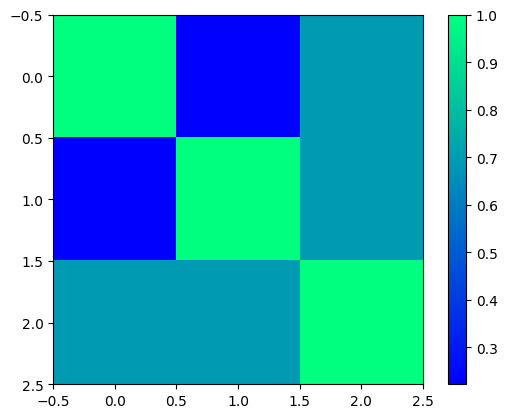

In [137]:
fig = plt.figure()
ax = plt.imshow(comssim_values, cmap = 'winter')
cbar = fig.colorbar(ax)
plt.show()